In [ ]:
import pandas as pd
import numpy as np
application = pd.read_csv("C:/Users/PC/Downloads/applications(2.0).csv")
print(application.head(10))

In [2]:
#1
# Прибери дублікати applicant_id
application = application.drop_duplicates(subset= ["applicant_id"])
#В полі 'External Rating' заповни відсутні значення нулями
application["External Rating"] = application["External Rating"].fillna(0)
#В полі 'Education level' заповни відсутні значення текстом “Середня”
application["Education level"] = application["Education level"].fillna("Середня")

In [ ]:
industries = pd.read_csv("C:/Users/PC/Downloads/industries(2.0).csv")
print(industries.head(10))

In [ ]:
#2
# Додай до цього DataFrame дані з файлу industries.csv, а саме, рейтинги індустрій.
application = application.merge( industries, on = "Industry", how="left")
print(application.head(10))

In [ ]:
def rating_function(row):
    if pd.isna(row["Amount"]) or row["External Rating"] == 0:
        return 0
    
    # Критерій 1: Вік
    rating = 0
    if 35 <= row["Age"] < 55:
        rating += 20
    
    # Критерій 2: День подачі
    row["Applied at"] = pd.to_datetime(row["Applied at"], dayfirst=True, errors='coerce')
    if pd.isna(row["Applied at"]):
        return 0  
    
    if row["Applied at"].weekday() < 5:  # Monday-Friday are 0-4
        rating += 20
    
    # Критерій 3: Сімейний статус
    if row["Marital status"] == "Married":
        rating += 20
    
    # Критерій 4: Місцезнаходження
    if isinstance(row["Location"], str) and "Київ" in row["Location"]:
        rating += 20
    
    # Критерій 5: Значення рейтингу з таблиці  
    rating += row["Score"]
    
    # Критерій 6: Врахування зовнішнього рейтингу
    if row["External Rating"] >= 7:
        rating += 20
    elif row["External Rating"] < 2:
        rating -= 20
    
    # Обмеження до 100
    return max(0, min(100, rating))

# Додавання рейтингу до DataFrame
application['Application Rating'] = application.apply(rating_function, axis=1)

# Виводимо оновлений DataFrame
print(application[['applicant_id', 'Application Rating']])

In [ ]:
application= application[application["Application Rating"]>0]
print(application.head(10))

In [ ]:
application = application.dropna(subset=["Applied at"])
application["Applied at"] = pd.to_datetime(application["Applied at"], errors="coerce")
application["Week"] = application["Applied at"].dt.isocalendar().week
application["Year"] = application["Applied at"].dt.year.astype(int)

# Групування за роком і тижнем, та розрахунок середнього рейтингу
weekly_average = application.groupby(["Year", "Week"])["Application Rating"].mean().reset_index()

# Створення дати з року і тижня
weekly_average["Date"] = pd.to_datetime(weekly_average["Year"].astype(str) + weekly_average["Week"].astype(str) + '1', format='%Y%W%w')

# Перегляд результату
print(weekly_average.head(10))

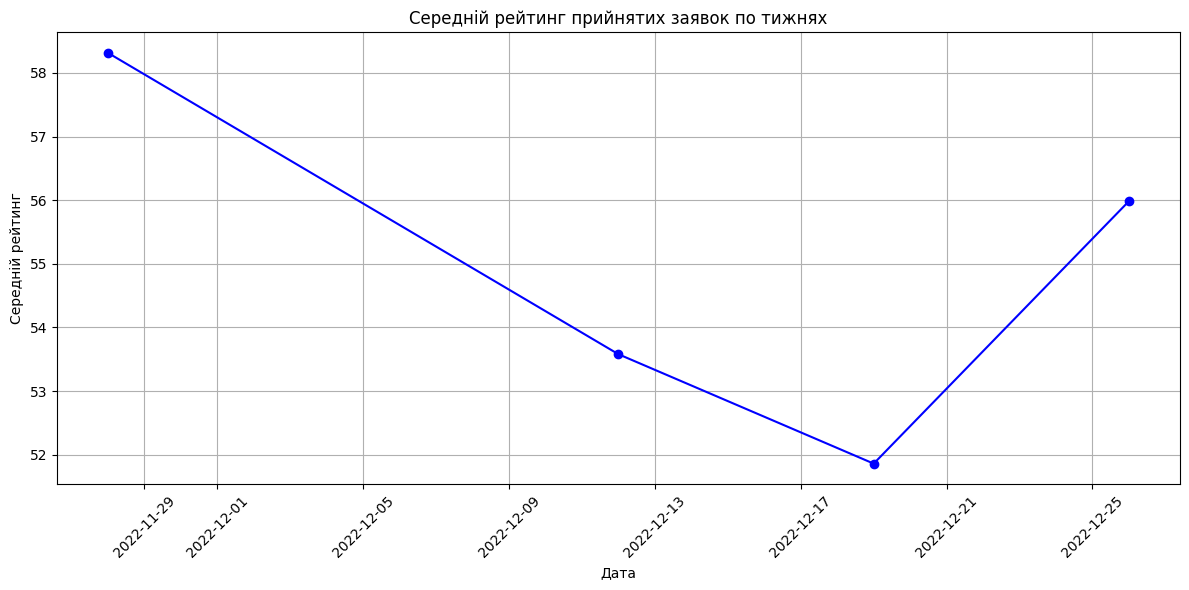

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(weekly_average["Date"], weekly_average["Application Rating"], marker='o', linestyle='-', color='b')
plt.title("Середній рейтинг прийнятих заявок по тижнях")
plt.xlabel("Дата")
plt.ylabel("Середній рейтинг")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()
